About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News


In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
news_dataset = pd.read_csv('/content/data.csv')

In [6]:
news_dataset.shape

(20800, 5)

In [7]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# counting the number of missing values in the dataset


In [8]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
news_dataset = news_dataset.fillna('')

In [10]:
news_dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [12]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [13]:
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [14]:
print(X)

          id  ...                                            content
0          0  ...  Darrell Lucus House Dem Aide: We Didn’t Even S...
1          1  ...  Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2          2  ...  Consortiumnews.com Why the Truth Might Get You...
3          3  ...  Jessica Purkiss 15 Civilians Killed In Single ...
4          4  ...  Howard Portnoy Iranian woman jailed for fictio...
...      ...  ...                                                ...
20795  20795  ...  Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796  20796  ...  Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797  20797  ...  Michael J. de la Merced and Rachel Abrams Macy...
20798  20798  ...  Alex Ansary NATO, Russia To Hold Parallel Exer...
20799  20799  ...            David Swanson What Keeps the F-35 Alive

[20800 rows x 5 columns]


In [15]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [16]:
port_stem = PorterStemmer()

In [17]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [18]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [19]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [20]:
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [21]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [22]:
print(Y)

[1 0 1 ... 0 1 1]


In [23]:
Y.shape

(20800,)

In [24]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [25]:
print(vectorizer.idf_)

[10.24960916 10.24960916  9.84414405 ... 10.24960916 10.24960916
 10.24960916]


In [26]:
print(vectorizer.vocabulary_)

{'darrel': 3600, 'lucu': 8909, 'hous': 7005, 'dem': 3792, 'aid': 267, 'even': 4973, 'see': 13473, 'comey': 2959, 'letter': 8630, 'jason': 7692, 'chaffetz': 2483, 'tweet': 15686, 'daniel': 3568, 'flynn': 5503, 'hillari': 6816, 'clinton': 2813, 'big': 1497, 'woman': 16799, 'campu': 2223, 'breitbart': 1894, 'consortiumnew': 3103, 'com': 2943, 'truth': 15611, 'might': 9620, 'get': 5968, 'fire': 5389, 'jessica': 7756, 'purkiss': 12027, 'civilian': 2736, 'kill': 8137, 'singl': 13892, 'us': 16036, 'airstrik': 293, 'identifi': 7162, 'howard': 7013, 'portnoy': 11671, 'iranian': 7548, 'jail': 7658, 'fiction': 5334, 'unpublish': 15936, 'stori': 14556, 'stone': 14544, 'death': 3662, 'adulteri': 175, 'nussbaum': 10546, 'jacki': 7637, 'mason': 9265, 'hollywood': 6903, 'would': 16847, 'love': 8879, 'trump': 15582, 'bomb': 1729, 'north': 10459, 'korea': 8273, 'lack': 8373, 'tran': 15462, 'bathroom': 1265, 'exclus': 5022, 'video': 16226, 'life': 8685, 'luxuri': 8945, 'elton': 4675, 'john': 7824, 'favor

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9873798076923077


In [32]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print(X_test_prediction)

[1 1 1 ... 1 1 1]


In [34]:
print('accuracy score: %.2f' % model.score(X_test, Y_test))

accuracy score: 0.98


In [35]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9774038461538461


In [36]:
X_new = X_test[3000]
#print(X_new)
prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[0]
The news is Real


In [37]:
print(Y_test[3000])

0


In [38]:
y_pred=model.predict(X_test)

In [39]:
Y_test

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[1952,   79],
       [  15, 2114]])

In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2031
           1       0.96      0.99      0.98      2129

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



Predicted     0     1
Actual               
0          1952    79
1            15  2114


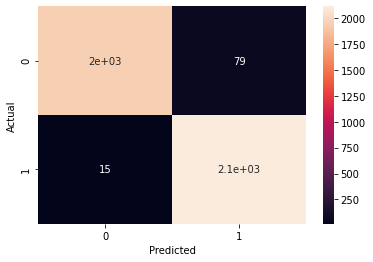

In [43]:
import seaborn as sns
cm = pd.crosstab(Y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True)
print(cm)

In [44]:
tab = pd.crosstab(Y_test,y_pred)
np.diag(tab).sum() / tab.to_numpy().sum()

0.9774038461538461

In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[1952   79]
 [  15 2114]]
